![bse_logo_textminingcourse](https://bse.eu/sites/default/files/styles/bgse_image_highlighted_image/public/carrousel/BSE_Summer_School.jpg?itok=rz2Sx5Ok)

# Harnessing Language Models: Your Path to NLP Expert - Day 1

# Introduction to Natural Language Processing (NLP)

This notebook gives you a brief introduction in text pre-processing pipelines in NLP. We start with reading in a labelled text corpus from Ag-news and exploring its variables. We then go through a canonical pre-processing pipeline used for the so-called "bags of words" model which represents documents in a document-term-matrix. Finally, we will discuss one of the many tokenizers used for deep learning methods.

## Table of Contents

1. **[Part 1: Read in Text and Explore](#part1)**

2. **[Part 2: Pre-processing for Bag of Words Model](#part2)**

3. **[Part 3: The Document Term Matrix](#part3)**

4. **[Part 4: Tf-idf](#part4)**

5. **[Part 5: Appied Research - Implementation of Generation of Dictionary from Labelled Documents](#part5)**

6. **[Homework](#hw)**



#Pre-amble

The following shows the structure of what we will do again and again now.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts=["I like apples", "I like oranges","I like apples and I like oranges"]

In [41]:
vectorizer=TfidfVectorizer()
tfidf_mat=vectorizer.fit_transform(texts)

In [42]:
tfidf_mat.toarray()

array([[0.        , 0.78980693, 0.61335554, 0.        ],
       [0.        , 0.        , 0.61335554, 0.78980693],
       [0.53058735, 0.40352536, 0.62674687, 0.40352536]])

In [43]:
vectorizer.get_feature_names_out()

array(['and', 'apples', 'like', 'oranges'], dtype=object)

#Installation

Now let's move on and install the packages needed for the session.

In [ ]:
!pip install pandas
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:


import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

import spacy

import pandas as pd

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

import re


from tqdm import tqdm
tqdm.pandas()


#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a name="part1"></a>
## Part 1: Read in Text and Explore

We will load the AG News corpus and perform necessary preprocessing steps like exploring the dataset.

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Load the 'ag_news' dataset
dataset = load_dataset("ag_news")

# Explore the structure of the dataset
print(dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


Let's create stratified samples for training and validation sets ensuring that each class is represented in proportion to its frequency. It will go faster with just a sample, and we will be able to make tests on validation test before trying to work on the testing set.

In [ ]:
corpus_data = pd.DataFrame(dataset['train']['text'][:30000])
corpus_data.columns =['text']
corpus_data['labels'] = dataset['train']['label'][:30000]
corpus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   labels  30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Save the DataFrame to Google Drive
file_path = '/content/drive/My Drive/corpus_data.csv'
corpus_data.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
corpus_data.text[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

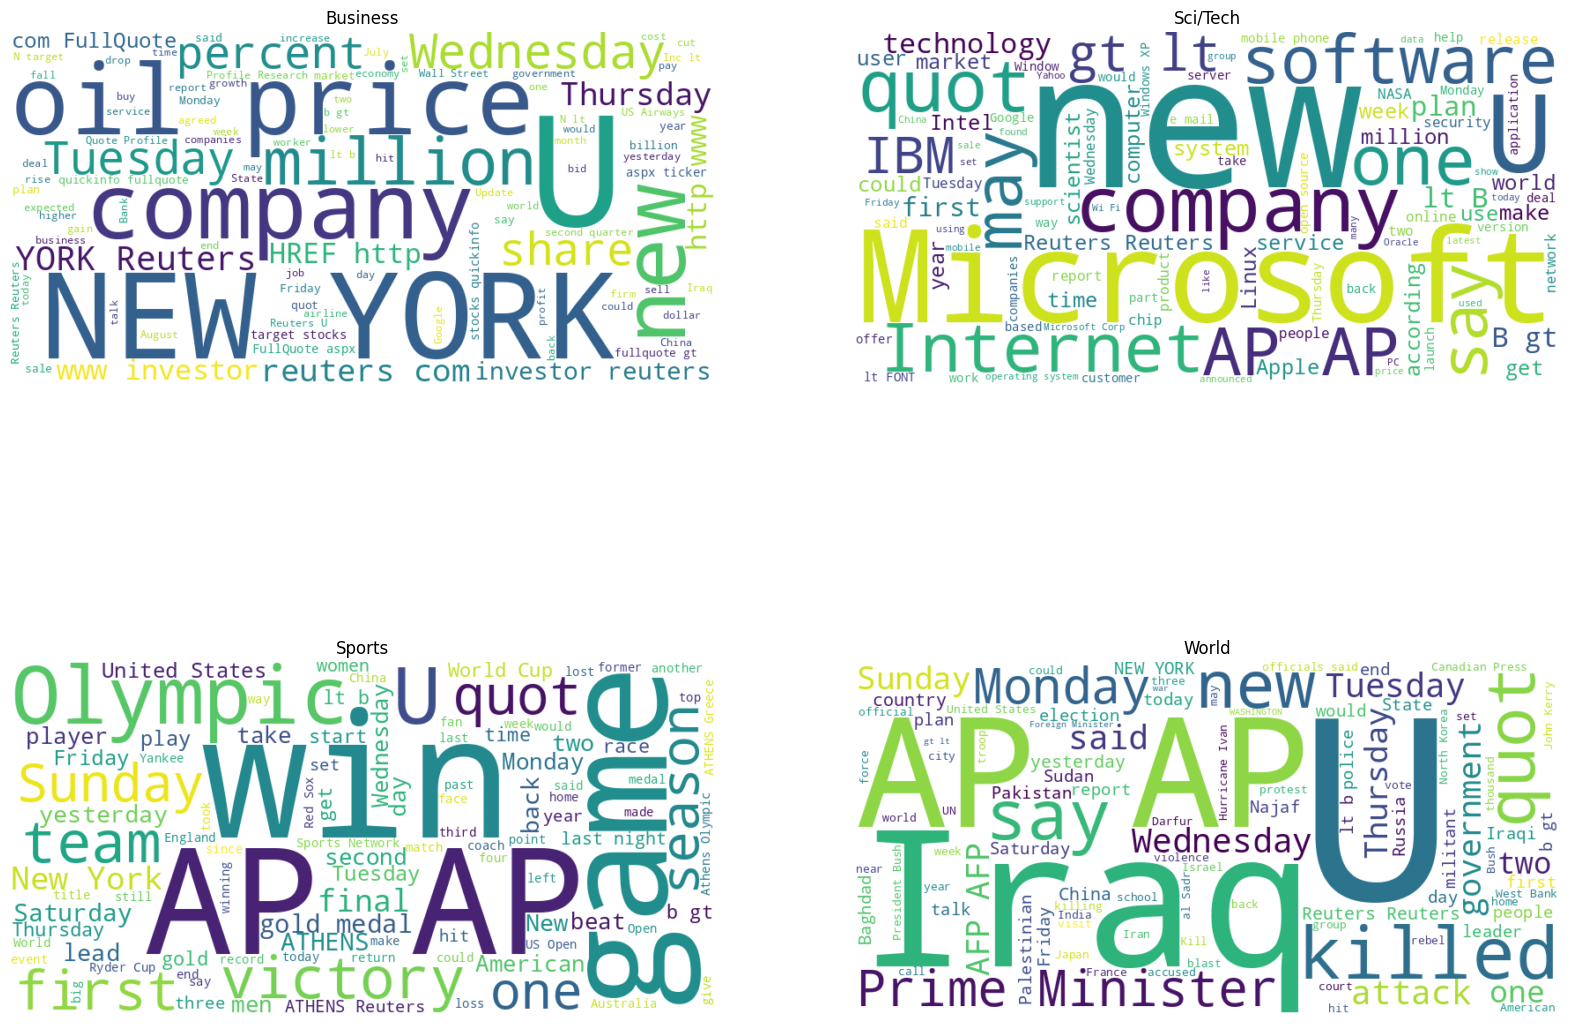

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

labels = {0: 'World', 1: 'Sports',
          2: 'Business', 3: 'Sci/Tech'}

# Prepare data for wordclouds
# Aggregate texts by their labels
text_by_label = defaultdict(str)
for text, label in zip(corpus_data['text'], corpus_data['labels']):
    text_by_label[label] += " " + text

# Generate and plot wordclouds for each label
plt.figure(figsize=(20, 15))
for idx, (label, text) in enumerate(text_by_label.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(text)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()


Word clouds show the most common terms in large letters. What do you not like about these word clouds?

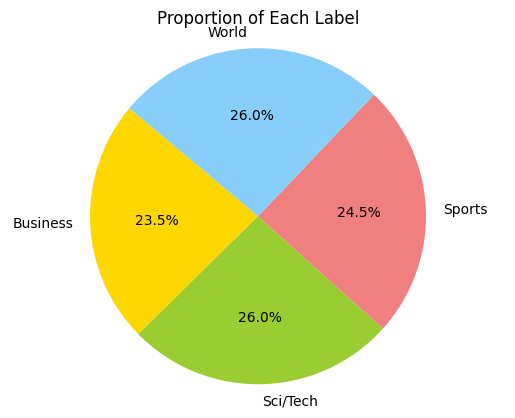

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each label
label_counts = Counter(corpus_data['labels'])

# Data to plot
_labels = [labels.get(lab) for lab in label_counts.keys()]
sizes = label_counts.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plotting the pie chart
plt.pie(sizes, labels=_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Each Label')
plt.show()


<a name="part2"></a>
## Part 2: Pre-processing

Pre-processing for is a very important part of text analysis when using the the bag-of-words model. The code below contains a pipeline that offers three options:

- modulation=0: convert to lower case

- modulation=1: stemming

- modulation=2: lemmatizing

The pipeline always does: tokenization, remove punctuation, remove stopwords

It then make counts to construct the document-term matrix (vectorization)

Towards the end I show you the way using sklearn package which will also facilitate the inclusion of N-grams in the document term matrix.

**Companion notebook for pre-processing introduction**
The companion notebook gives you a much more detailed discussion of all the steps in pre-processing. These are (in the best order):
- **Tokenization**

- **Normalization**
  - Lemmatizing
  - Removing punctuation
  - Unifying text (e.g., converting to lower case)
  - Removing stopwords
  - Stemming

- **Counting (N-grams) -> Document-Term Matrix (Vectorization)**

This is not the order you typically see on webpages talking about pre-processing but I think it is the actual order in which you approach things chronologically. Lemmatizing is the really odd one in the order. It is also the most complex and the least well-packaged. So worth spending a little time on.

### Define our functions to clean the data

In [61]:
#this requires spacy to be installed
sp = spacy.load('en_core_web_sm')

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### Apply cleaning functions

In [ ]:
tqdm.pandas(desc="my progress bar")

#=0 means just lowercase, #=1 means stemming, =2 means lemmatizing
###########################################################
###########################################################
mod=1
###########################################################
###########################################################


#pre-process text
text_preproc = (
    corpus_data.text
    .astype(str)
    .progress_apply(lambda row: tokenize(row, mod))
)

corpus_data["text_preproc"]=text_preproc

print("done with text")




my progress bar: 100%|██████████| 30000/30000 [00:16<00:00, 1780.99it/s]

done with text


In [ ]:
#raw text
print(corpus_data.text[0])

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


In [ ]:
#preprocessed text
print(corpus_data.text_preproc[0])

wall st bear claw back black reuter reuter short seller wall street dwindl band ultra cynic see green


<a name="part3"></a>
# Part 3: Document Term Matix


In [ ]:
%%time
cv = CountVectorizer(ngram_range = (1,1), lowercase=False)
cv.fit(corpus_data.text_preproc)



vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)


document term matrix has size (30000, 24229)
CPU times: user 1.66 s, sys: 2.74 s, total: 4.4 s
Wall time: 4.48 s


In [ ]:
len(cv.get_feature_names_out())

24229

## Experiment with the CountVectorizer

Use the following options:

- ngram_range=(1, 1), (1,2), (2,2), (3,3)

- max_df=1.0, 0.5, 0.2

- min_df=1, 5, 0.1

How does it affect the vocabulary you get out?

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


In [ ]:
# Assuming 'cv' is your CountVectorizer instance and 'vectorized_text' is the result of transformation
# And 'assigned_labels' are the labels for each document in your dataset
import numpy as np

# Get feature names to use as words for the word clouds
feature_names = cv.get_feature_names_out()

# Aggregate counts by label
label_counts = {}
for label in np.unique(corpus_data['labels']):
    # Select rows of 'vectorized_text' that correspond to the current label
    label_indices = np.where(corpus_data['labels']== label)[0]
    label_matrix = vectorized_text[label_indices]

    # Sum counts for the current label
    aggregated_counts = np.sum(label_matrix, axis=0)

    # Convert the aggregated counts to a dictionary {word: count}
    # Note: 'aggregated_counts' is a matrix; use '.A1' to convert it to an array for easier handling
    word_counts = {feature_names[i]: aggregated_counts[0, i] for i in range(len(feature_names))}
    label_counts[label] = word_counts


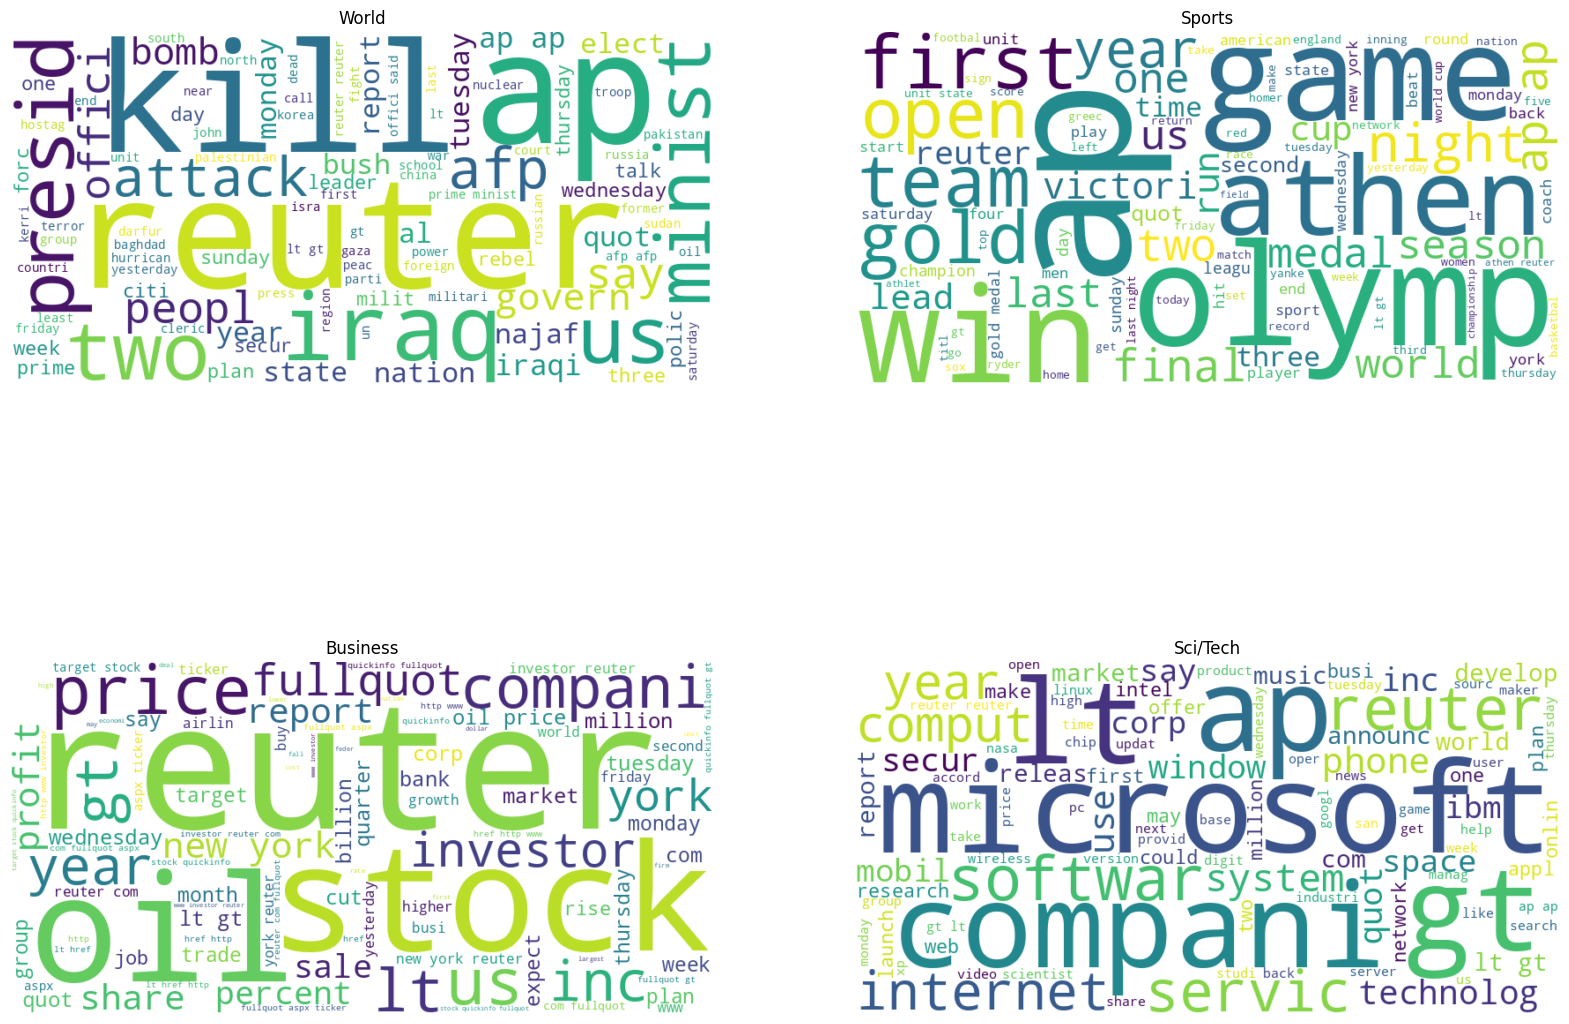

In [ ]:


plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()

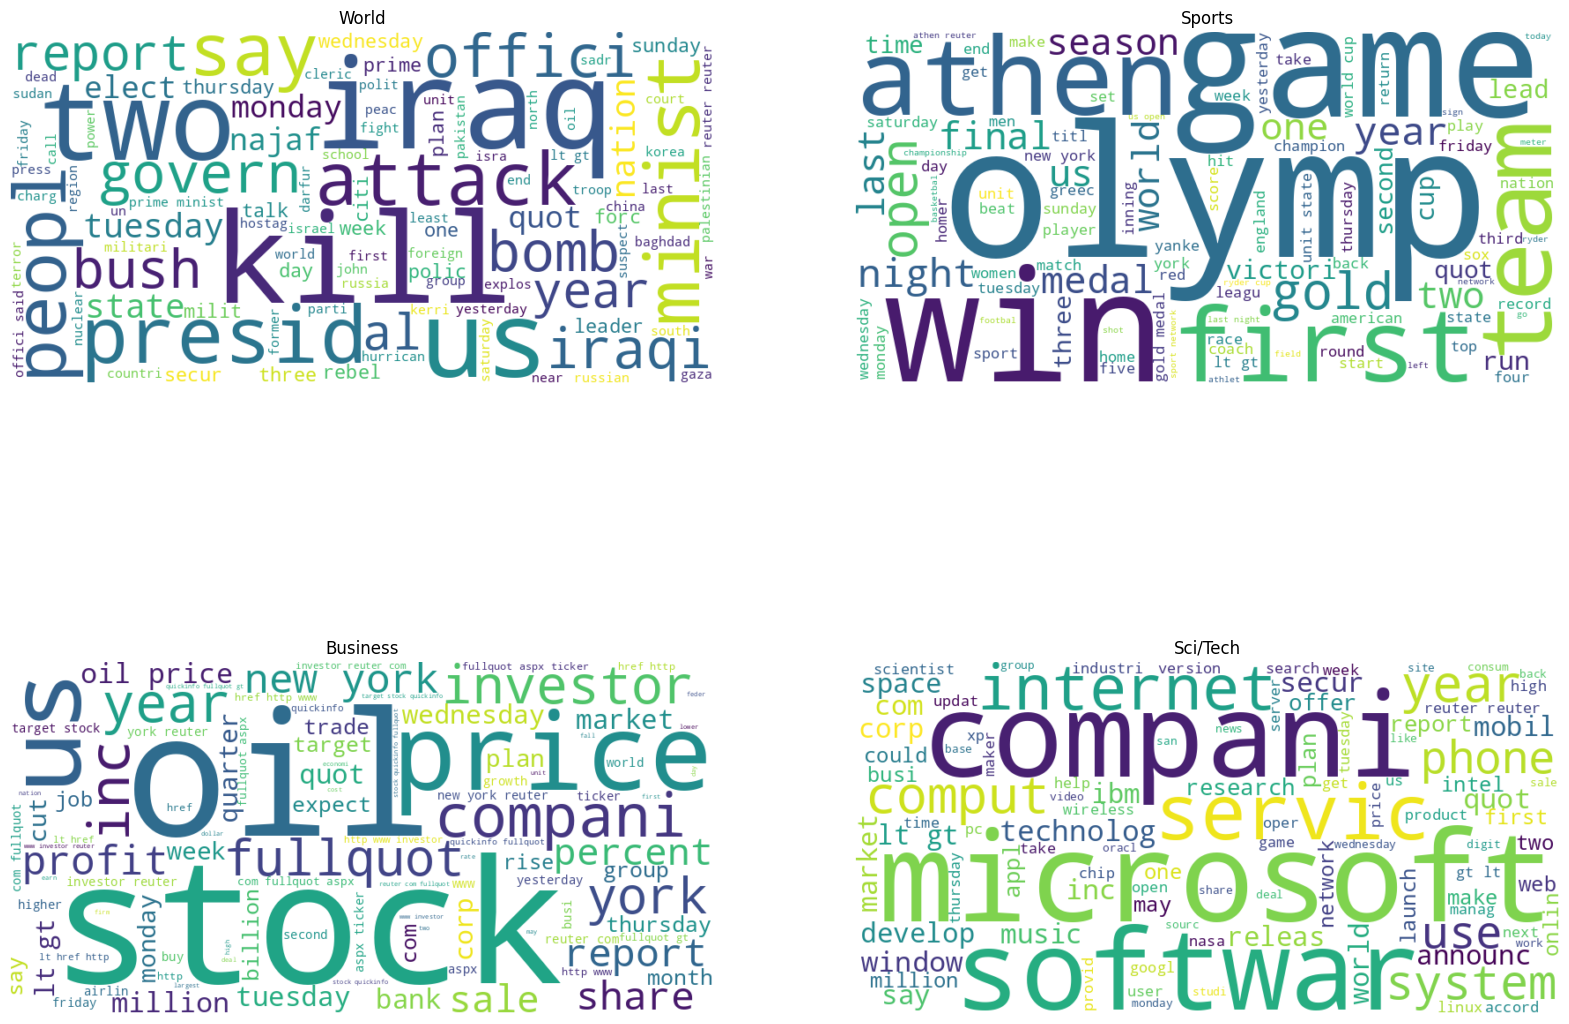

In [ ]:
plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):

    # NEW LINE: Remove 'ap' from the word counts if it exists
    word_counts_filtered = {word: count for word, count in word_counts.items() if word not in ['reuter','ap','lt','gt', 'ap ap','afp','afp afp']}

    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts_filtered)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()



<a name="part4"></a>
## Part 4: Adding tf-idf weighting

Now we will use the same min_df and max_df settings but then do a Tfidf weighting after we vectorize. The result is are word clouds that slightly downweigh very common terms. You see this in ap becoming smaller when compared to the word cloud generated by the same count vectorizer setting without tf-idf weighting.

In [ ]:
cv = TfidfVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


In [ ]:
# Get feature names to use as words for the word clouds
feature_names = cv.get_feature_names_out()

# Aggregate counts by label
label_counts = {}
for label in np.unique(corpus_data['labels']):
    # Select rows of 'vectorized_text' that correspond to the current label
    label_indices = np.where(corpus_data['labels']== label)[0]
    label_matrix = vectorized_text[label_indices]

    # Sum counts for the current label
    aggregated_counts = np.sum(label_matrix, axis=0)

    # Convert the aggregated counts to a dictionary {word: count}
    # Note: 'aggregated_counts' is a matrix; use '.A1' to convert it to an array for easier handling
    word_counts = {feature_names[i]: aggregated_counts[0, i] for i in range(len(feature_names))}
    label_counts[label] = word_counts

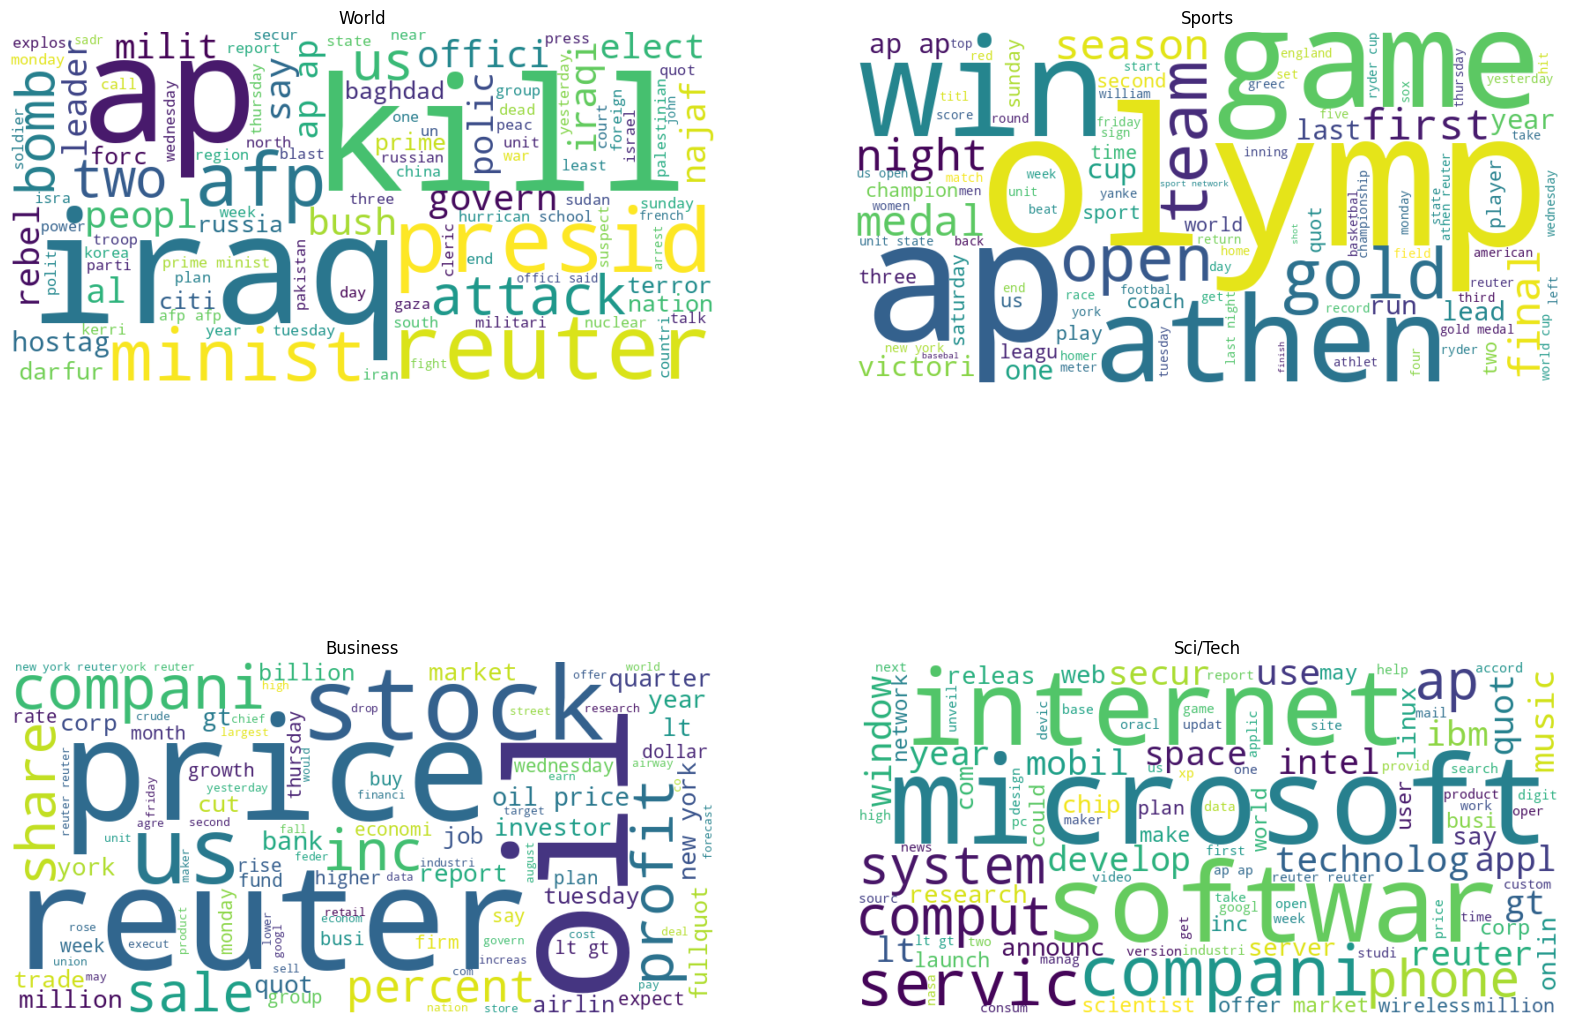

In [ ]:
plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()

<a name="part5"></a>
# Part 5: Appied Research - Implementation of Generation of Dictionary from Labelled Documents

In this part of the notebook we simulate the making of dictionaries as in Hassan et al and Uribe at al (2024). We use the labels first to make four large documents. You would typically do the same generating documents from textbooks from finance and politics for example or like we do in our paper on Spain from discussions of historians or other experts. You then use the tf-idf and see what comes out on top. This method can yield extremely nice dictionaries for identifying issues.

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.toarray()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())



from scipy.sparse import csr_matrix

# Assuming 'vectorized_text' is the document-term matrix from CountVectorizer
# and 'assigned_labels' are the labels for each document

# Create an empty matrix with the same number of columns as 'vectorized_text' and rows for each unique label
num_labels = len(np.unique(corpus_data['labels']))
num_features = vectorized_text.shape[1]
aggregated_by_label = csr_matrix((num_labels, num_features))

# Sum up the vectors for each label
for label in np.unique(corpus_data['labels']):
    label_indices = np.where(corpus_data['labels'] == label)[0]
    aggregated_by_label[label] = vectorized_text[label_indices].sum(axis=0)


document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
aggregated_by_label=aggregated_by_label.toarray()

In [ ]:
# Adjust the TF-IDF transformer to avoid division by zero errors
tfidf_transformer = TfidfTransformer(smooth_idf=True, sublinear_tf=True)

# Try transforming the aggregated document-term matrix again
try:
    tfidf_matrix = tfidf_transformer.fit_transform(aggregated_by_label)
except ValueError as e:
    print(f"Error transforming matrix: {e}")


### Approach 1: List-Based Exclusion


* Ignore List: Utilizes a hardcoded list of terms (`ignore_dictionary`) to exclude from the word clouds.
* Direct Filtering: Iterates through the word frequencies and explicitly checks if each word is not in the ignore_dictionary before including it in the word cloud.

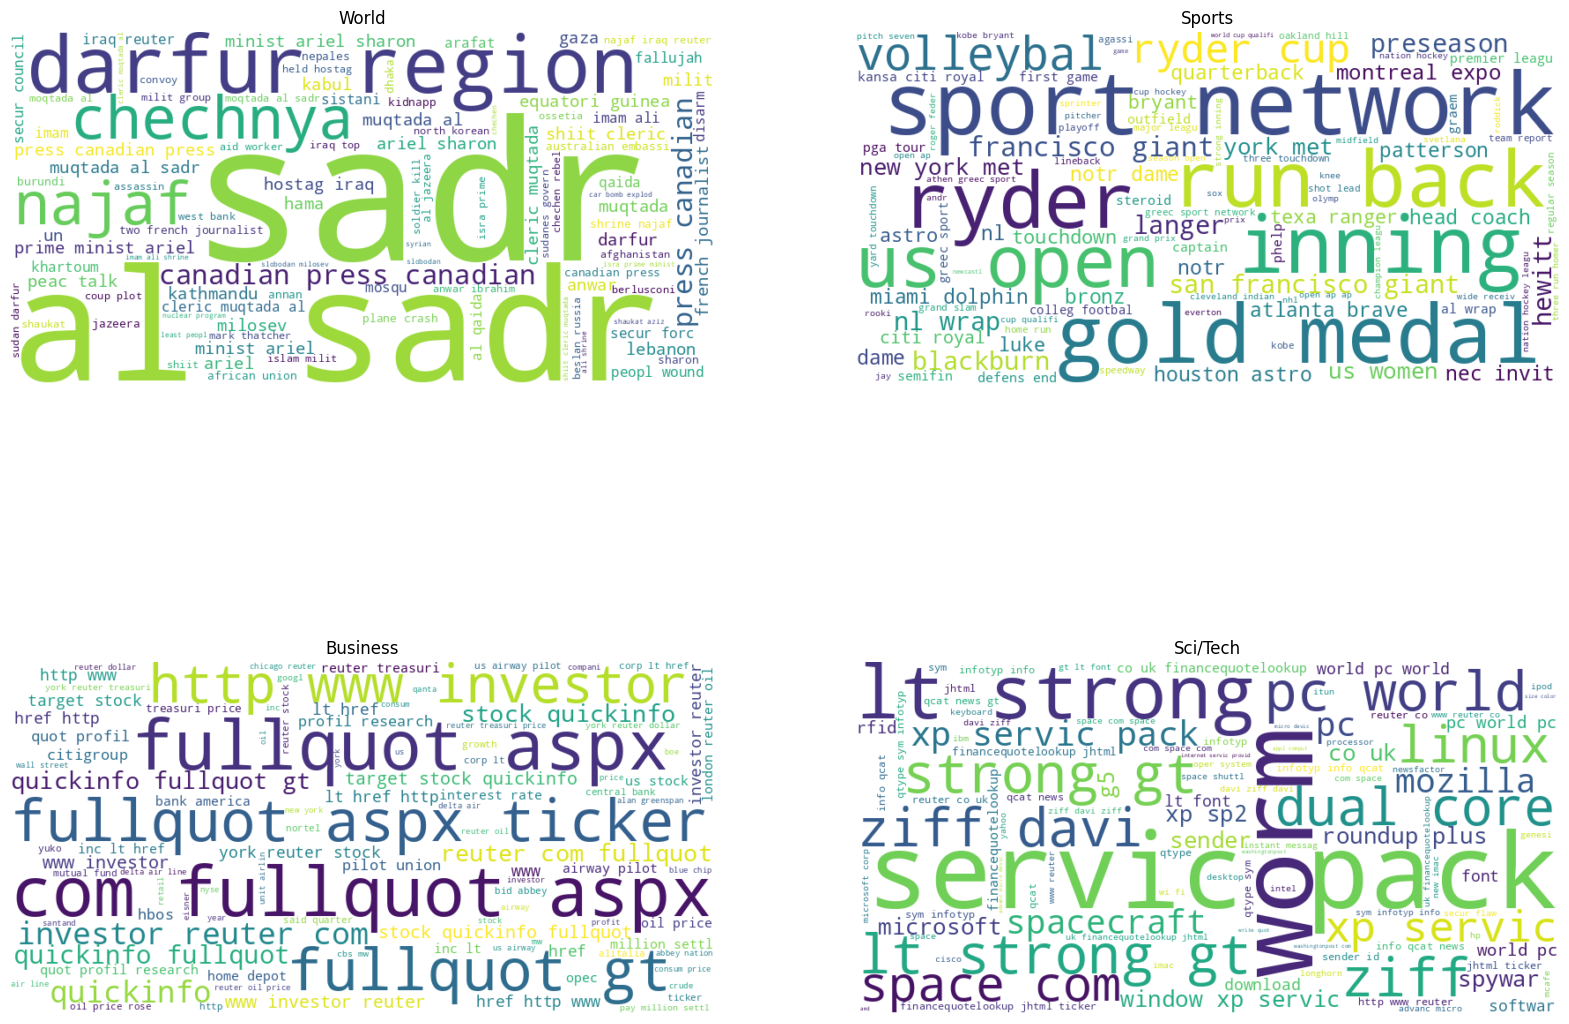

In [ ]:
plt.figure(figsize=(20, 15))

# Assuming 'cv' is the original CountVectorizer instance to get feature names
feature_names = cv.get_feature_names_out()

ignore_dictionary=['fullquot','com fullquot','aspx','aspx ticker','com','reuter com', 'reuter','ap','lt','gt', 'ap ap','afp','afp afp']

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    word_freqs_filtered = {word: count for word, count in word_freqs.items() if word not in ignore_dictionary}
    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_freqs_filtered)

    plt.subplot(2, 2, label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()


### Approach 2: Regex-Based Exclusion


* Regex Pattern: Uses a compiled regular expression pattern to match and exclude words based on a pattern (pattern).
* Pattern Matching: Filters out words by checking if they match the regex pattern, which can identify terms based on partial or full patterns within the words.
* Dynamic Matching: More flexible in matching a range of related or similar terms without specifying each one explicitly.

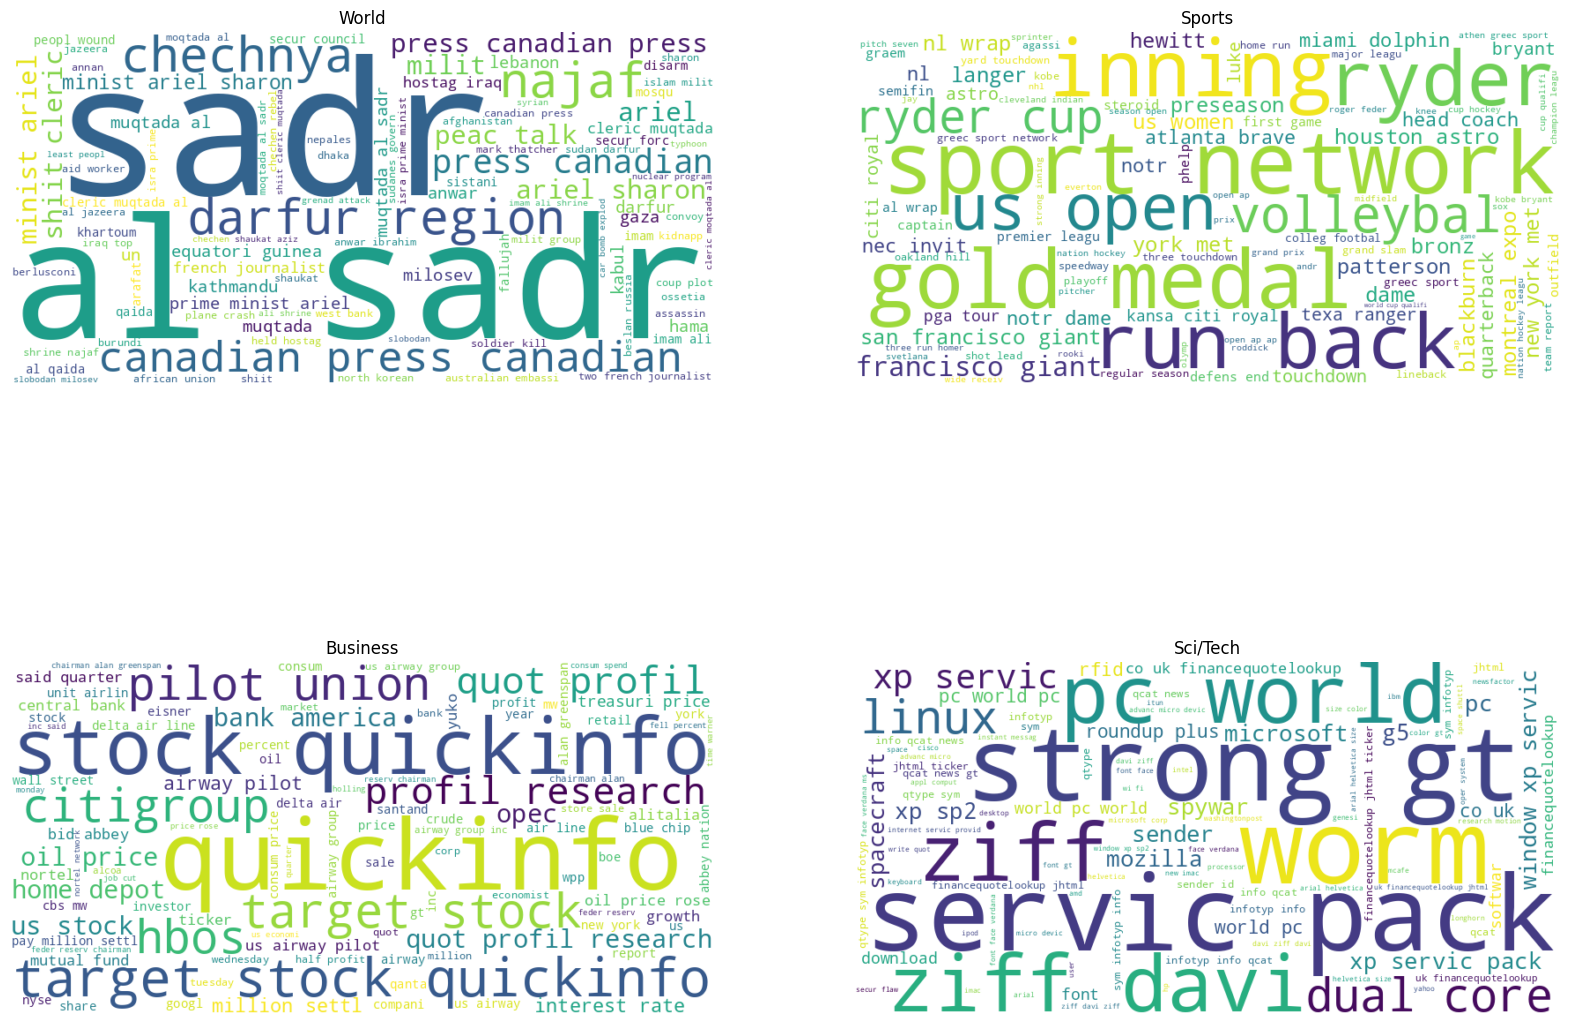

In [ ]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'cv', 'num_labels', 'tfidf_matrix', 'labels', and 'stop_words' are already defined

# Compile a regex pattern to match "fullquot", "com", or "apx" as whole words
pattern = re.compile(r'\b(fullquot|com|aspx|www|reuter|http|lt|href)\b')

plt.figure(figsize=(20, 15))

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    feature_names = cv.get_feature_names_out()
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    # Use the compiled regex pattern to filter out words matching the pattern
    word_freqs_filtered = {word: count for word, count in word_freqs.items() if not pattern.search(word)}

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_freqs_filtered)

    plt.subplot(2, 2, label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()



## Top 10

Just to get a slightly different perspective using the exact same methodology as above, lets visualize these differently by looking at the top 10 highest TFIDF scores in each.

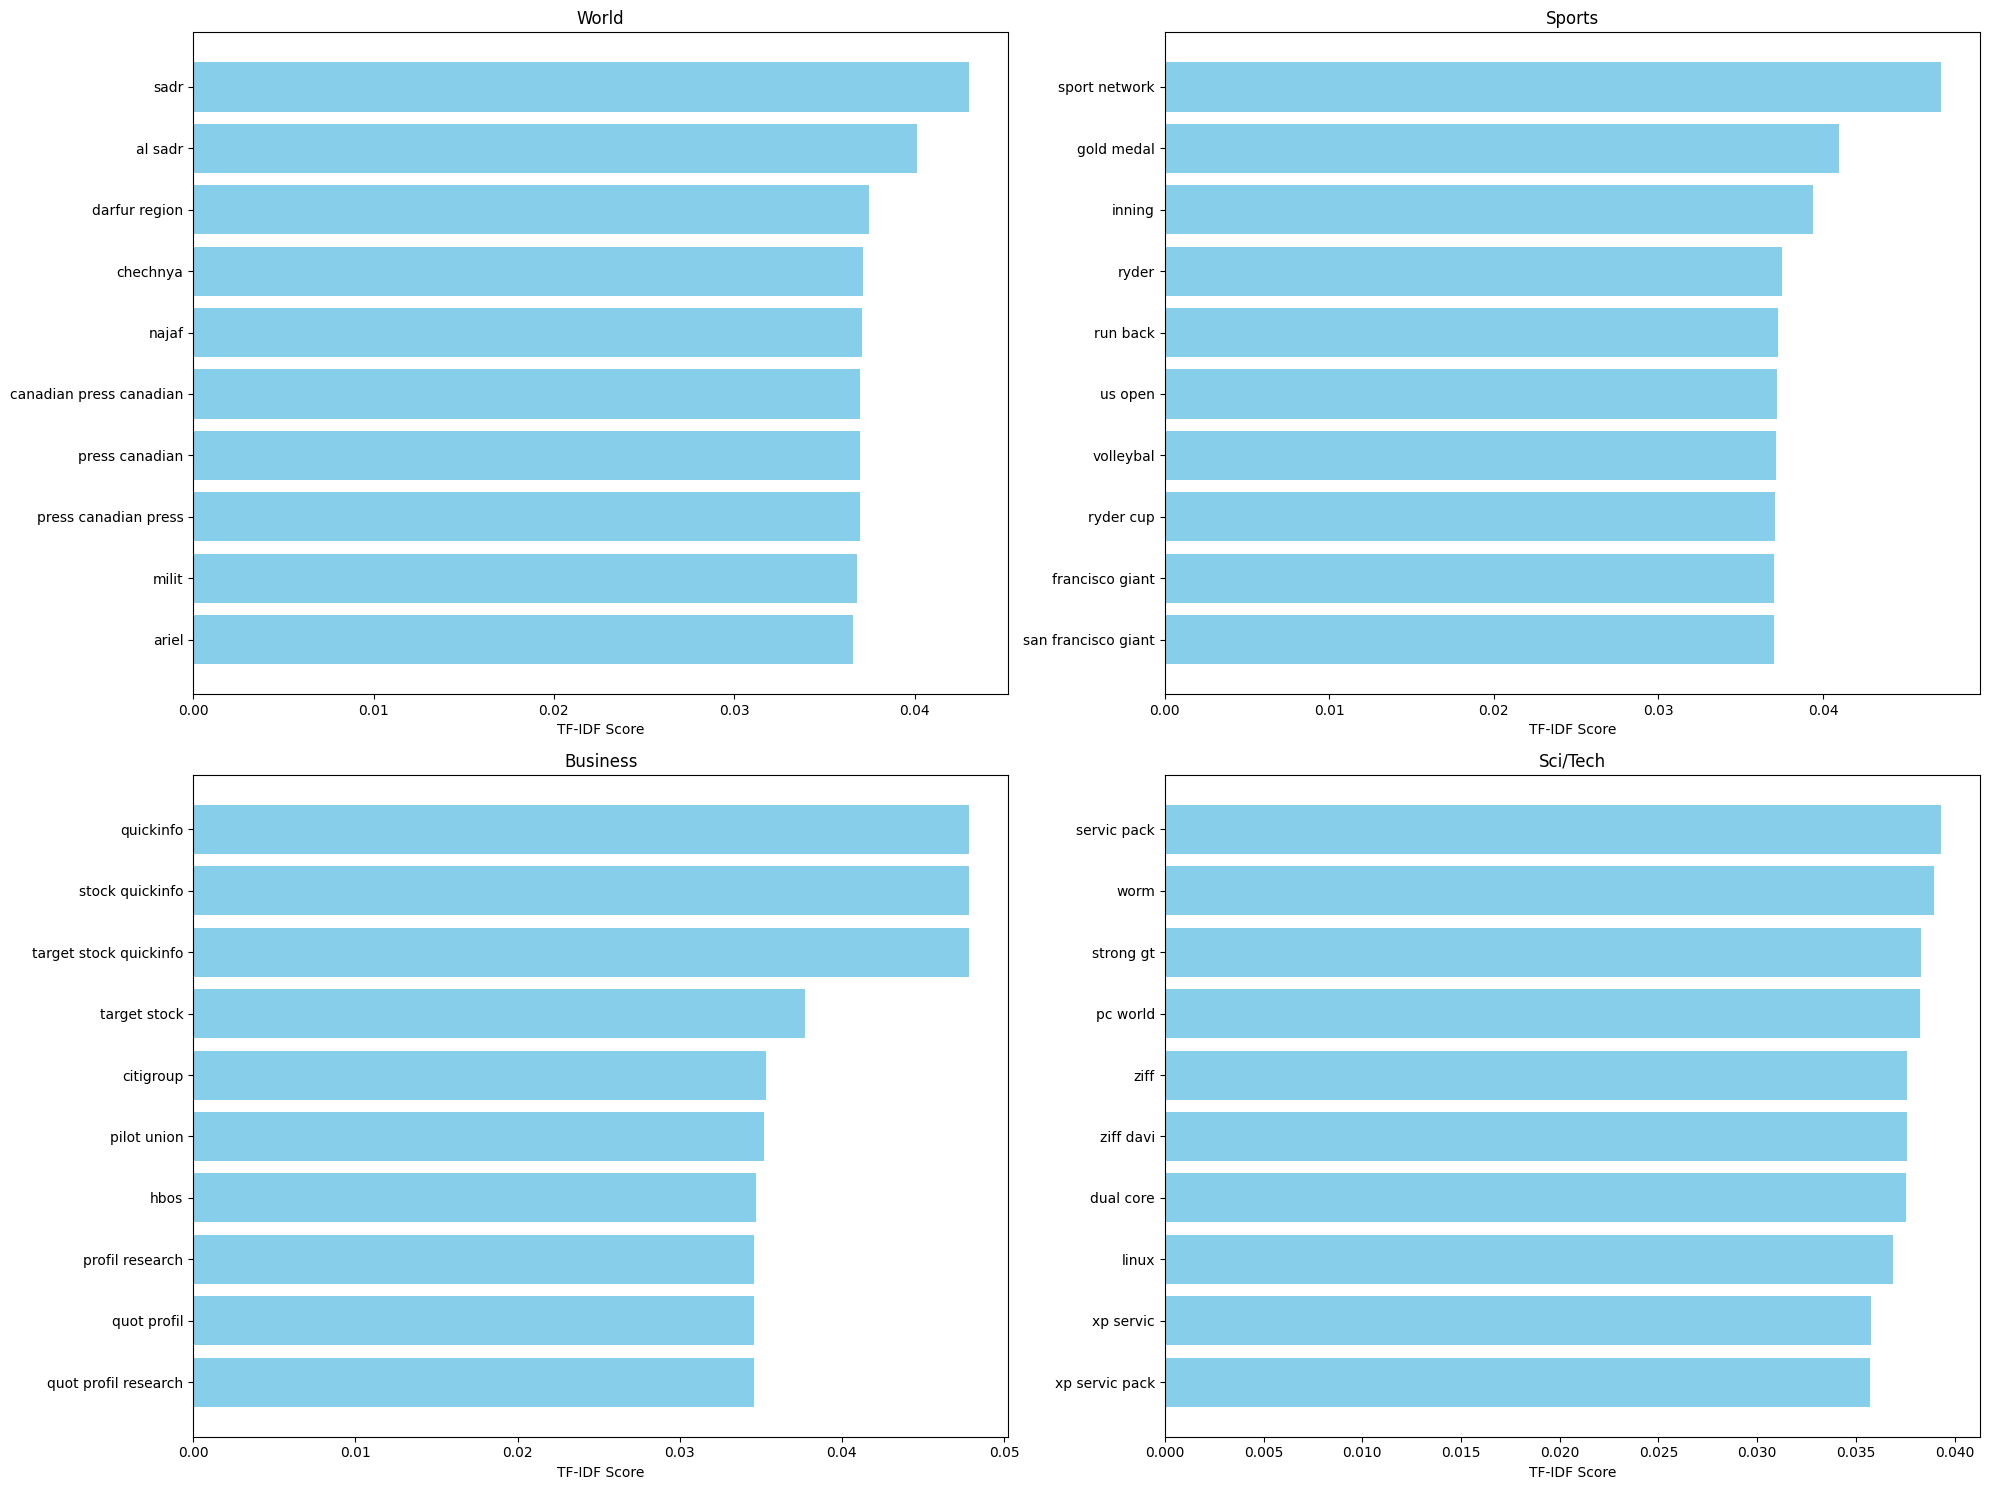

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Compile a regex pattern to match unwanted terms as whole words
pattern = re.compile(r'\b(fullquot|com|aspx|www|reuter|http|lt|href)\b')

plt.figure(figsize=(20, 15))

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    feature_names = cv.get_feature_names_out()
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    # Use the compiled regex pattern to filter out words matching the pattern
    word_freqs_filtered = {word: count for word, count in word_freqs.items() if not pattern.search(word)}

    # Sort the words by frequency and pick the top 10
    top_words = sorted(word_freqs_filtered.items(), key=lambda item: item[1], reverse=True)[:10]

    # Separate the words and their corresponding frequencies for plotting
    words, freqs = zip(*top_words)

    # Create a subplot for each label
    plt.subplot(2, 2, label + 1)
    plt.barh(words, freqs, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title(labels[label])
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top

plt.tight_layout()
plt.show()

<a name="hw"></a>
# Homework

Come up with your own list of documents that you want to use to generate a dictionary. You can opt for using a lot of generic text that you pack into different documents and one main type of text that you want to target or 4 equally interesting types of dictionaries that you want to create. Please:

* get your own paragraphs - explain why you chose this
* preprocess the text (experiment with this step)
* create tfidf matrix (experiment with this step)
* print out dictionary lists with at least 20 terms

In [55]:
#Hannes example generated with ChatGPT
finance="Finance encompasses the management, creation, and study of money and investments. It plays a critical role in the economic stability and growth of any nation. Financial markets facilitate the trading of assets, helping to price assets based on their risk and expected return. Effective financial management involves strategic planning to ensure liquidity and profitability while managing risks. Innovations in financial technology, or fintech, have revolutionized the industry, providing new ways for individuals and businesses to manage their finances, invest, and access credit. Additionally, global finance impacts international trade, with exchange rates and monetary policies influencing economic activities worldwide."
economics="Economics studies how societies allocate scarce resources to meet their needs and wants. It delves into the behavior of individuals, firms, and governments, examining how they make choices and the implications of these choices. Microeconomics focuses on individual and business decisions, while macroeconomics looks at broader economic factors like inflation, unemployment, and GDP growth. Economic theories and models help policymakers design strategies to promote economic stability and growth. Globalization has interconnected economies, making international trade and finance crucial components of economic analysis. Furthermore, economic policies, such as taxation and government spending, directly influence economic activity and societal well-being."
politics="Politics involves the processes through which decisions are made within groups, particularly within states or nations. It encompasses the structures, activities, and behaviors associated with governance and power. Political systems can vary widely, from democracies to autocracies, each with different methods of selecting leaders and making policy decisions. Politics affects nearly every aspect of society, influencing laws, economic policies, social norms, and international relations. Political stability is crucial for economic growth and societal well-being, as instability can lead to uncertainty and conflict. Moreover, political ideologies and movements shape public discourse and policy priorities, impacting everything from healthcare and education to environmental regulation and human rights."
biology="Biology is the scientific study of life and living organisms, exploring their structure, function, growth, evolution, and distribution. It encompasses a vast range of sub-disciplines, including genetics, ecology, and molecular biology. Advances in biological research have led to significant discoveries, such as the structure of DNA and the mechanisms of genetic inheritance, which have profound implications for medicine and biotechnology. Understanding the principles of biology is essential for addressing global challenges like disease, food security, and environmental conservation. Additionally, the study of ecosystems and biodiversity highlights the interconnectedness of life and the importance of preserving natural habitats to maintain ecological balance."

In [56]:
#making a list from these strings
corpus=[finance,economics,politics,biology]

In [57]:
#count vectorizing with tfidf weighting
vectorizer=TfidfVectorizer(ngram_range = (1,2), max_df=0.9, stop_words="english")
tfidf_mat=vectorizer.fit_transform(corpus)

In [58]:
tfidf_mat.toarray()

array([[0.085881  , 0.085881  , 0.06770957, ..., 0.        , 0.        ,
        0.085881  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06792654, ..., 0.0861562 , 0.0861562 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
#printing out dictionaries (this is the goal of the homework)

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Function to get the top N terms for each document
def get_top_terms(tfidf_matrix, terms, top_n=20):
    for i in range(tfidf_matrix.shape[0]):
        # Get the row corresponding to the document
        row = tfidf_matrix[i].toarray().flatten()
        # Get indices of top n terms
        top_indices = row.argsort()[-top_n:][::-1]
        # Get the terms and their corresponding tf-idf scores
        top_terms = [(terms[index], row[index]) for index in top_indices]
        print(f"Document {i + 1}:")
        for term, score in top_terms:
            print(f"  {term}: {score:.4f}")
        print()

# Print the top 20 terms for each document
get_top_terms(tfidf_mat, terms, top_n=20)

Document 1:
  financial: 0.2576
  management: 0.1718
  assets: 0.1718
  finance: 0.1354
  economic: 0.1096
  involves strategic: 0.0859
  management involves: 0.0859
  management creation: 0.0859
  manage finances: 0.0859
  manage: 0.0859
  liquidity profitability: 0.0859
  liquidity: 0.0859
  worldwide: 0.0859
  managing risks: 0.0859
  investments plays: 0.0859
  investments: 0.0859
  invest access: 0.0859
  invest: 0.0859
  innovations financial: 0.0859
  innovations: 0.0859

Document 2:
  economic: 0.3296
  choices: 0.1722
  factors like: 0.0861
  focuses individual: 0.0861
  crucial components: 0.0861
  economies: 0.0861
  economies making: 0.0861
  needs wants: 0.0861
  needs: 0.0861
  furthermore: 0.0861
  furthermore economic: 0.0861
  gdp: 0.0861
  gdp growth: 0.0861
  resources: 0.0861
  resources meet: 0.0861
  components economic: 0.0861
  globalization interconnected: 0.0861
  components: 0.0861
  choices microeconomics: 0.0861
  choices implications: 0.0861

Document 3:
 

This is already pretty nice. But let's try to get rid of plurals through lemmatizing to make it even nicer. The following code first puts the corpus list object we had before into a nice pandas dataframe and then pre-processes using the tools we initialized above. I consciously opted for lemmatizing as I want the dictionary to look nice and readable to humans in the end.

In [63]:
#putting list into pandas dataframe under the column text
corpus_df = pd.DataFrame(corpus, columns=["text"])

In [66]:
tqdm.pandas(desc="my progress bar")

#=0 means just lowercase, #=1 means stemming, =2 means lemmatizing
###########################################################
###########################################################
mod=2
###########################################################
###########################################################


#pre-process text
text_preproc = (
    corpus_df.text
    .astype(str)
    .progress_apply(lambda row: tokenize(row, mod))
)

corpus_df["text_preproc"]=text_preproc

print("done with text")


my progress bar: 100%|██████████| 4/4 [00:00<00:00, 22.84it/s]

done with text


In [67]:
corpus_df

text  \
0  Finance encompasses the management, creation, ...   
1  Economics studies how societies allocate scarc...   
2  Politics involves the processes through which ...   
3  Biology is the scientific study of life and li...   

                                        text_preproc  
0  finance encompass management creation study mo...  
1  economics study society allocate scarce resour...  
2  politic involve process decision make within g...  
3  biology scientific study life living organism ...

Now go back to the pipeline.

In [68]:
vectorizer=TfidfVectorizer(ngram_range = (1,2), max_df=0.9, stop_words="english")
tfidf_mat=vectorizer.fit_transform(corpus_df.text_preproc)

In [69]:
tfidf_mat.toarray()

array([[0.08500263, 0.08500263, 0.05425608, ..., 0.        , 0.        ,
        0.08500263],
       [0.        , 0.        , 0.05508359, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05552555, ..., 0.08699151, 0.08699151,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [70]:
# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Function to get the top N terms for each document
def get_top_terms(tfidf_matrix, terms, top_n=20):
    for i in range(tfidf_matrix.shape[0]):
        # Get the row corresponding to the document
        row = tfidf_matrix[i].toarray().flatten()
        # Get indices of top n terms
        top_indices = row.argsort()[-top_n:][::-1]
        # Get the terms and their corresponding tf-idf scores
        top_terms = [(terms[index], row[index]) for index in top_indices]
        print(f"Document {i + 1}:")
        for term, score in top_terms:
            print(f"  {term}: {score:.4f}")
        print()

# Print the top 20 terms for each document
get_top_terms(tfidf_mat, terms, top_n=20)

Document 1:
  financial: 0.2550
  finance: 0.2011
  management: 0.1700
  asset: 0.1700
  risk: 0.1700
  manage: 0.1700
  economic: 0.1085
  liquidity profitability: 0.0850
  management involve: 0.0850
  management creation: 0.0850
  manage risk: 0.0850
  manage finance: 0.0850
  worldwide: 0.0850
  market facilitate: 0.0850
  liquidity: 0.0850
  involve strategic: 0.0850
  investment play: 0.0850
  investment: 0.0850
  invest access: 0.0850
  invest: 0.0850

Document 2:
  economic: 0.3305
  government: 0.1726
  choice: 0.1726
  make: 0.1361
  individual: 0.1361
  broad: 0.0863
  policymaker design: 0.0863
  gdp growth: 0.0863
  business decision: 0.0863
  policymaker: 0.0863
  broad economic: 0.0863
  scarce: 0.0863
  scarce resource: 0.0863
  interconnect economy: 0.0863
  policy taxation: 0.0863
  interconnect: 0.0863
  look broad: 0.0863
  macroeconomic: 0.0863
  macroeconomic look: 0.0863
  help policymaker: 0.0863

Document 3:
  political: 0.2610
  politic: 0.1740
  policy: 0.1666